## New York CitiBike: Bike Availability Predictor


In [8]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import timedelta 
import scipy.optimize as optimization
import sklearn.metrics as metrics

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_val_score

## Logistic Regression Model

In [9]:
# Load data and perform basic data cleaning
bikeStatus= pd.read_csv('bikeStatus_data.csv', index_col = None)
bikeStatus.head()

,bikes_available,bikes_disabled,docks_available,docks_disabled,station_id,datetime,timestamp,dom,weekday,hour,availability
0,22,3,30,0,72,2020-08-01 03:23:00,1.314641e+09,1,5,3,1
1,26,1,6,0,79,2020-08-01 03:29:00,1.314641e+09,1,5,3,1
2,22,4,1,0,82,2020-08-01 03:31:00,1.314641e+09,1,5,3,1
3,37,1,24,0,83,2020-08-01 03:30:00,1.314641e+09,1,5,3,1
4,39,3,8,0,116,2020-08-01 03:27:00,1.314641e+09,1,5,3,1


In [11]:
bikeStatus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403762 entries, 0 to 403761
Data columns (total 11 columns):
bikes_available    403762 non-null int64
bikes_disabled     403762 non-null int64
docks_available    403762 non-null int64
docks_disabled     403762 non-null int64
station_id         403762 non-null int64
datetime           403762 non-null object
timestamp          403762 non-null float64
dom                403762 non-null int64
weekday            403762 non-null int64
hour               403762 non-null int64
availability       403762 non-null int64
dtypes: float64(1), int64(9), object(1)
memory usage: 33.9+ MB


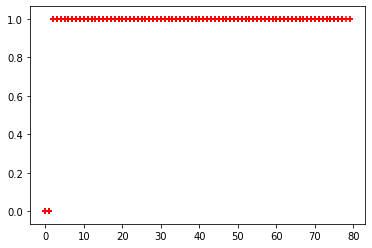

In [12]:
# Create a scatter plot(bikeavalability at all the stations) to show the distribution.
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
plt.scatter(bikeStatus.bikes_available,bikeStatus.availability,marker='+',color='red')

#### For this dataset, the scatter plot shows bikes are available most of the time.

### Features Selection (columns)

In [13]:
# Create classifiers
from sklearn.svm import LinearSVC
lr = LogisticRegression
SVC = LinearSVC(C=1.0)
rfc = RandomForestClassifier(n_estimators=100)

In [14]:
# Drop unneccesary columns (datetime & bikes_available, created new column(availability) with binary values )
 
bikeStatus = bikeStatus.drop(columns=['datetime','timestamp'])
bikeStatus.head(3)

,bikes_available,bikes_disabled,docks_available,docks_disabled,station_id,dom,weekday,hour,availability
0,22,3,30,0,72,1,5,3,1
1,26,1,6,0,79,1,5,3,1
2,22,4,1,0,82,1,5,3,1


In [15]:
# bikeStatus.info(3)

In [16]:
bikeStatus.tail()

,bikes_available,bikes_disabled,docks_available,docks_disabled,station_id,dom,weekday,hour,availability
403757,0,0,24,0,4061,7,4,10,0
403758,12,0,11,0,4064,7,4,1,1
403759,0,0,3,0,4071,7,4,9,0
403760,2,0,42,0,4072,7,4,11,1
403761,13,1,21,0,4073,7,4,10,1


In [17]:
# create the the dependent (target=y) and independent variables(x)
x = bikeStatus[['bikes_available','bikes_disabled', 'docks_available', 'docks_disabled', 'station_id', 
        'dom', 'weekday', 'hour']]
y = bikeStatus['availability']

In [19]:
# x.head(3)
# y.head()

### Create a Train Test Split

In [18]:
# split the data to train and test values

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [19]:
# preivew the x_train samble values used to train our model
x_train

,bikes_available,bikes_disabled,docks_available,docks_disabled,station_id,dom,weekday,hour
245653,13,5,1,0,3042,6,3,9
50681,32,0,10,0,3152,4,1,23
386147,16,1,22,0,257,7,4,8
123237,14,0,2,10,3646,5,2,12
343877,7,3,55,0,496,7,4,1
...,...,...,...,...,...,...,...,...
359783,29,1,1,0,3510,7,4,2
358083,13,0,8,0,3982,7,4,1
152315,4,0,13,0,3897,5,2,17
117952,6,1,18,0,3499,5,2,11


### Pre-processing

In [20]:
# Import dependencies
from sklearn.preprocessing import LabelEncoder, MinMaxScaler,StandardScaler
#from tensorflow.keras.utils import to_categorical

# scale the data with StandardScaler
x_scaler = StandardScaler().fit(x_train)
x_train_scaled = x_scaler.transform(x_train)
x_test_scaled = x_scaler.transform(x_test)

# Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)
print(encoded_y_test)

[1 1 1 ... 1 1 1]


### Train the Model

In [21]:
from sklearn.linear_model import LogisticRegression
# create an object for this class (lrmodel)
lrModel = LogisticRegression()
lrModel

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
# fit the data and make predictions
lrModel.fit(x_train_scaled, encoded_y_train)
predictions = lrModel.predict(x_test_scaled)
predictions

C:\Users\BIJa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [23]:
print(f"Training Data Score: {lrModel.score(x_train_scaled, encoded_y_train)}")
print(f"Testing Data Score: {lrModel.score(x_test_scaled, encoded_y_test)}")

Training Data Score: 1.0
Testing Data Score: 1.0


In [41]:
# using probability prediction
lrModel.predict_proba(x_test)

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

####  The probability scores shows there is 100% chance a bike will be available
ps. for the given dataset.

In [42]:
from sklearn.metrics import classification_report
print(classification_report(encoded_y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9055
           1       1.00      1.00      1.00     71698

    accuracy                           1.00     80753
   macro avg       1.00      1.00      1.00     80753
weighted avg       1.00      1.00      1.00     80753



### Hyperparameter Tuning

In [37]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [10, 50, 100],
             'max_iter':[200, 500, 1000]}
grid = GridSearchCV(lrModel,param_grid, verbose=3)

In [38]:
# Train the model with GridSearch
grid.fit(x_train_scaled, encoded_y_train)

C:\Users\BIJa\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\BIJa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] C=10, max_iter=200 ..............................................
[CV] .................. C=10, max_iter=200, score=1.000, total=   2.3s
[CV] C=10, max_iter=200 ..............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s
C:\Users\BIJa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................. C=10, max_iter=200, score=1.000, total=   2.3s
[CV] C=10, max_iter=200 ..............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.5s remaining:    0.0s
C:\Users\BIJa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................. C=10, max_iter=200, score=1.000, total=   2.2s
[CV] C=10, max_iter=500 ..............................................


C:\Users\BIJa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................. C=10, max_iter=500, score=1.000, total=   2.1s
[CV] C=10, max_iter=500 ..............................................


C:\Users\BIJa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................. C=10, max_iter=500, score=1.000, total=   2.4s
[CV] C=10, max_iter=500 ..............................................


C:\Users\BIJa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................. C=10, max_iter=500, score=1.000, total=   2.3s
[CV] C=10, max_iter=1000 .............................................


C:\Users\BIJa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................. C=10, max_iter=1000, score=1.000, total=   2.1s
[CV] C=10, max_iter=1000 .............................................


C:\Users\BIJa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................. C=10, max_iter=1000, score=1.000, total=   2.3s
[CV] C=10, max_iter=1000 .............................................


C:\Users\BIJa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................. C=10, max_iter=1000, score=1.000, total=   2.8s
[CV] C=50, max_iter=200 ..............................................


C:\Users\BIJa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................. C=50, max_iter=200, score=1.000, total=   2.7s
[CV] C=50, max_iter=200 ..............................................


C:\Users\BIJa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................. C=50, max_iter=200, score=1.000, total=   2.8s
[CV] C=50, max_iter=200 ..............................................


C:\Users\BIJa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................. C=50, max_iter=200, score=1.000, total=   2.6s
[CV] C=50, max_iter=500 ..............................................


C:\Users\BIJa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................. C=50, max_iter=500, score=1.000, total=   2.3s
[CV] C=50, max_iter=500 ..............................................


C:\Users\BIJa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................. C=50, max_iter=500, score=1.000, total=   2.6s
[CV] C=50, max_iter=500 ..............................................


C:\Users\BIJa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................. C=50, max_iter=500, score=1.000, total=   2.5s
[CV] C=50, max_iter=1000 .............................................


C:\Users\BIJa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................. C=50, max_iter=1000, score=1.000, total=   2.4s
[CV] C=50, max_iter=1000 .............................................


C:\Users\BIJa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................. C=50, max_iter=1000, score=1.000, total=   2.7s
[CV] C=50, max_iter=1000 .............................................


C:\Users\BIJa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................. C=50, max_iter=1000, score=1.000, total=   2.4s
[CV] C=100, max_iter=200 .............................................


C:\Users\BIJa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................. C=100, max_iter=200, score=1.000, total=   2.3s
[CV] C=100, max_iter=200 .............................................


C:\Users\BIJa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................. C=100, max_iter=200, score=1.000, total=   2.7s
[CV] C=100, max_iter=200 .............................................


C:\Users\BIJa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................. C=100, max_iter=200, score=1.000, total=   2.4s
[CV] C=100, max_iter=500 .............................................


C:\Users\BIJa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................. C=100, max_iter=500, score=1.000, total=   2.3s
[CV] C=100, max_iter=500 .............................................


C:\Users\BIJa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................. C=100, max_iter=500, score=1.000, total=   2.6s
[CV] C=100, max_iter=500 .............................................


C:\Users\BIJa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................. C=100, max_iter=500, score=1.000, total=   2.5s
[CV] C=100, max_iter=1000 ............................................


C:\Users\BIJa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................ C=100, max_iter=1000, score=1.000, total=   2.3s
[CV] C=100, max_iter=1000 ............................................


C:\Users\BIJa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................ C=100, max_iter=1000, score=1.000, total=   2.6s
[CV] C=100, max_iter=1000 ............................................


C:\Users\BIJa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................ C=100, max_iter=1000, score=1.000, total=   2.4s


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  1.1min finished
C:\Users\BIJa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [10, 50, 100], 'max_iter': [200, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [39]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 10, 'max_iter': 200}
1.0


In [43]:
lrModel.coef_

array([[ 5.34140740e+01,  2.43630871e-03, -7.69968108e-02,
        -2.76165472e-03, -5.42149645e-02, -1.89345306e-02,
         2.52261907e-03, -1.27149220e-03]])

In [44]:
np.transpose(lrModel.coef_)

array([[ 5.34140740e+01],
       [ 2.43630871e-03],
       [-7.69968108e-02],
       [-2.76165472e-03],
       [-5.42149645e-02],
       [-1.89345306e-02],
       [ 2.52261907e-03],
       [-1.27149220e-03]])

### Model Evaluation using Confusion Matrix

In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
confusion_matrix(lrModel.predict(x_train), y_train)

array([[ 28908,  12997],
       [  7336, 273768]], dtype=int64)

In [32]:
confusion_matrix(lrModel.predict(x_test), y_test)

array([[ 7288,  3264],
       [ 1767, 68434]], dtype=int64)

### Save the Model

In [34]:
# save the model
import joblib
filename = 'lrModel.sav'
joblib.dump(lrModel, filename)

['lrModel.sav']

## Random Forest Classifier

In [45]:
rfc = RandomForestClassifier(n_estimators=100)

In [46]:
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [47]:
rfc.score(x_train, y_train)

1.0

In [48]:
rfc.score(x_test, y_test)

1.0

In [49]:
rfc.predict(x_train)[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [50]:
from sklearn.metrics import confusion_matrix

In [51]:
confusion_matrix(rfc.predict(x_train), y_train)

array([[ 36244,      0],
       [     0, 286765]], dtype=int64)

In [52]:
confusion_matrix(rfc.predict(x_test), y_test)

array([[ 9055,     0],
       [    0, 71698]], dtype=int64)

In [79]:
# save the model
import joblib
filename = 'rfc.sav'
joblib.dump(rfc, filename)

['rfc.sav']

## Linear SVC Model

In [65]:
SVC = LinearSVC(C=1.0)

In [66]:
SVC.fit(x_train, y_train)

C:\Users\BIJa\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [67]:
SVC.score(x_train, y_train)

1.0

In [68]:
SVC.score(x_test, y_test)

1.0

In [69]:
SVC.coef_

array([[ 2.02070450e+00, -1.78440547e-02, -6.05190939e-03,
        -4.51327676e-03, -1.98512655e-05, -8.83377808e-03,
        -8.53283938e-02, -1.39487732e-02]])

In [70]:
np.transpose(SVC.coef_)

array([[ 2.02070450e+00],
       [-1.78440547e-02],
       [-6.05190939e-03],
       [-4.51327676e-03],
       [-1.98512655e-05],
       [-8.83377808e-03],
       [-8.53283938e-02],
       [-1.39487732e-02]])

In [71]:
from sklearn.metrics import confusion_matrix

In [72]:
confusion_matrix(SVC.predict(x_train), y_train)

array([[ 36244,      0],
       [     0, 286765]], dtype=int64)

In [73]:
confusion_matrix(SVC.predict(x_test), y_test)

array([[ 9055,     0],
       [    0, 71698]], dtype=int64)

In [74]:
SVC.predict(x_train)

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [80]:
# save the model
import joblib
filename = 'SVC.sav'
joblib.dump(SVC, filename)

['SVC.sav']

### KNeighborsClassifier

In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

In [2]:
# Load data and perform basic data cleaning
bikeStatus= pd.read_csv('bikeStatus_data.csv', index_col = None)
bikeStatus.head()

,bikes_available,bikes_disabled,docks_available,docks_disabled,station_id,datetime,timestamp,dom,weekday,hour,availability
0,22,3,30,0,72,2020-08-01 03:23:00,1.314641e+09,1,5,3,1
1,26,1,6,0,79,2020-08-01 03:29:00,1.314641e+09,1,5,3,1
2,22,4,1,0,82,2020-08-01 03:31:00,1.314641e+09,1,5,3,1
3,37,1,24,0,83,2020-08-01 03:30:00,1.314641e+09,1,5,3,1
4,39,3,8,0,116,2020-08-01 03:27:00,1.314641e+09,1,5,3,1


In [3]:
# create the the dependent (target=y) and independent variables(x)
X = bikeStatus[['bikes_available','bikes_disabled', 'docks_available', 'docks_disabled', 'station_id', 
        'dom', 'weekday', 'hour']]
target_values = ["0", "1"]
y = bikeStatus['availability']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [5]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [6]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.993
k: 3, Train/Test Score: 0.996/0.990
k: 5, Train/Test Score: 0.994/0.989
k: 7, Train/Test Score: 0.992/0.987
k: 9, Train/Test Score: 0.991/0.986
k: 11, Train/Test Score: 0.989/0.985
k: 13, Train/Test Score: 0.988/0.984
k: 15, Train/Test Score: 0.987/0.983
k: 17, Train/Test Score: 0.986/0.983
k: 19, Train/Test Score: 0.985/0.981
k: 21, Train/Test Score: 0.985/0.981
k: 23, Train/Test Score: 0.984/0.980
k: 25, Train/Test Score: 0.983/0.980
k: 27, Train/Test Score: 0.982/0.979
k: 29, Train/Test Score: 0.981/0.978


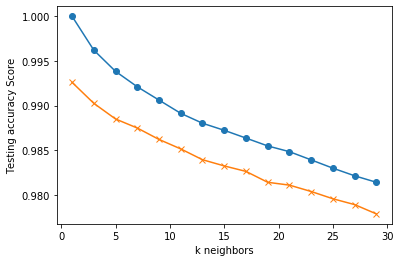

In [7]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 30, 2), train_scores, marker='o')
plt.plot(range(1, 30, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [8]:
# Note that k: 1 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scaled, y_train)
print('k=1 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=1 Test Acc: 0.993


In [12]:
#evaluatin the model using confusion Matrix
from sklearn.metrics import confusion_matrix

In [14]:
confusion_matrix(knn.predict(X_train), y_train)

array([[ 33965, 131062],
       [    42, 137752]], dtype=int64)

In [15]:
confusion_matrix(knn.predict(X_test), y_test)

array([[11278, 43841],
       [   14, 45808]], dtype=int64)

In [ ]:
knn.predict(X_train)

In [ ]:
import joblib
filename = 'knn.sav'
joblib.dump(knn, filename)

## How do the Models Compare?

### Logistic Regression Model:

Training Data Score: 1.0

Testing Data Score: 1.0

#### Confusion Matrix:

[ 7288,  3264]

[ 1767, 68434]


### Random Forest Classifier

Training Data Score: 1.0

Testing Data Score: 1.0

#### Confusion Matrix:

[ 9055,     0]

[    0, 71698]


### Linear SVC Model:

Training Data Score: 1.0

Testing Data Score: 1.0

#### Confusion Matrix:

[ 9055,     0]

[    0, 71698]


### KNeighborsClassifier

k=1 Test Acc: 0.993

#### Confusion Matrix:

[11278, 43841]

[   14, 45808]

#### Random Forest and the SVC models seem to be the best models for this dataset